# 1) 6개의 Toy Data에 대해 다양한 Clustering 적용해보기
### 아래 예시와 같이 다양하게 자신의 생각 도출하기
 - 지역적 패턴이 존재하는 DataSet에는 XX Clustering 방법을 쓰면 좋을 것 같다
 - XX Clustering은 길게 늘어진 데이터에 대해 잘 분류하는 것 같다
 - XX Clustering은 군집의 개수를 미리 정해야 해서 ~~ 경향이 있는 것 같다
 
### 조건
 - (기본)우리가 배운 3가지 Clustering
 - 데이터 간/클러스터 간 거리 측정 방식 다양하게 사용해서 비교
 - 새로운 Clustering 방법 사용하기(최소 2개 이상)

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import cycle, islice
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

### ToyData 만들기

In [2]:
# 다른 모양 Toy Data 6개 만들기
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [6]:
# noisy_circles, noisy_moons, blobs, no_structure, aniso, varied
# 각 toy 데이터의 변수 설정

X1,y1 = noisy_circles
X2,y2 = noisy_moons
X3,y3 = blobs
X4,y4 = no_structure
X5,y5 = aniso
X6,y6 = varied

***

## 각 데이터의 Clustering  적용

### 1. KMeans 군집 모델
Centroid 찾기

In [8]:
# KMeans 군집 모델

from sklearn.cluster import KMeans
y_pred1 = KMeans(n_clusters=3, random_state=0).fit_predict(X1)
y_pred2 = KMeans(n_clusters=3, random_state=0).fit_predict(X2)
y_pred3 = KMeans(n_clusters=3, random_state=0).fit_predict(X3)
y_pred4 = KMeans(n_clusters=3, random_state=0).fit_predict(X4)
y_pred5 = KMeans(n_clusters=3, random_state=0).fit_predict(X5)
y_pred6 = KMeans(n_clusters=3, random_state=0).fit_predict(X6)

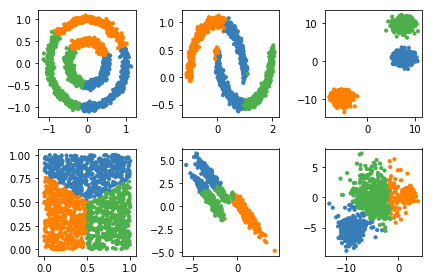

In [53]:
# Kmeans 군집 모델을 각 데이터 6개에 적용했을 때 모습 시각화

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred1) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

p1 = plt.subplot(2,3,1)
p1 = plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y_pred1])

p2 = plt.subplot(2,3,2)
p2 = plt.scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y_pred2])

p3 = plt.subplot(2,3,3)
p3 = plt.scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y_pred3])

p4 = plt.subplot(2,3,4)
p4 = plt.scatter(X4[:, 0], X4[:, 1], s=10, color=colors[y_pred4])

p5 = plt.subplot(2,3,5)
p5 = plt.scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y_pred5])

p6 = plt.subplot(2,3,6)
p6 = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y_pred6])

plt.tight_layout()
plt.show()

K-Means 모델의 단점과 같이 모두 3개의 군집으로 나눴지만 데이터의 형태에 따라 성능이 달라졌음을 볼 수 있다.  
1,2,5 번과 같이 지역적 패턴이 존재하는 군집의 판별에 어려움이 있다.  
3번과 같이 눈으로 보기에도 확연히 centroid 가 존재할 것 같은 군집은 매우 잘 분류하였다.  
의외로 6번은 잘 분류하였는데 6번은 데이터의 밀도가 조금 달라서 더 안 좋은 분류를 기대했으나 생각보다 잘 분류 되었다.

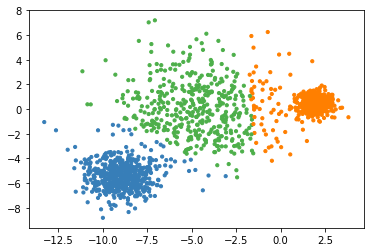

In [57]:
#  6번 데이터 
plt.scatter(X4[:, 0], X4[:, 1], s=10, color=colors[y_pred4])
plt.show()

Kmeans 알고리즘에서 k군집의 갯수를 5개로 변화시켜서 적용, 그려보았다.  
k : 3 -> 5

In [68]:
y_pred1_5 = KMeans(n_clusters=5, random_state=0).fit_predict(X1)
y_pred2_5 = KMeans(n_clusters=5, random_state=0).fit_predict(X2)
y_pred3_5 = KMeans(n_clusters=5, random_state=0).fit_predict(X3)
y_pred4_5 = KMeans(n_clusters=5, random_state=0).fit_predict(X4)
y_pred5_5 = KMeans(n_clusters=5, random_state=0).fit_predict(X5)
y_pred6_5 = KMeans(n_clusters=5, random_state=0).fit_predict(X6)

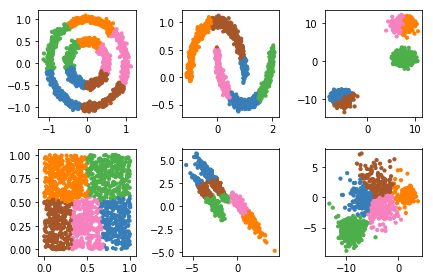

In [69]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred15) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

p1 = plt.subplot(2,3,1)
p1 = plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y_pred1_5])

p2 = plt.subplot(2,3,2)
p2 = plt.scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y_pred2_5])

p3 = plt.subplot(2,3,3)
p3 = plt.scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y_pred3_5])

p4 = plt.subplot(2,3,4)
p4 = plt.scatter(X4[:, 0], X4[:, 1], s=10, color=colors[y_pred4_5])

p5 = plt.subplot(2,3,5)
p5 = plt.scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y_pred5_5])

p6 = plt.subplot(2,3,6)
p6 = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y_pred6_5])

plt.tight_layout()
plt.show()

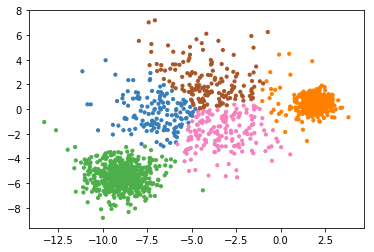

In [70]:
#  6번 데이터 
p6 = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y_pred6_5])
plt.show()

똑같이 개선되는 것이 없기 때문에 별로 큰 시사점은 얻지 못했다.  
kmeans를 사용한다면 k=3 등의 기본적인 군집의 개수글 찍어보고   
데이터에 따라 군집의 개수(k) 를 변화시켜주면 될 것 같다.    

### 2. DBSCAN 군집 모델
밀도기반

In [ ]:
"""
DBSCAN(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, 
       algorithm='auto', leaf_size=30, p=None, n_jobs=None)
"""

In [73]:
# DBSCAN 디폴트 값 사용 
DB = DBSCAN()
y_pred12 = DB.fit_predict(X1)
y_pred22 = DB.fit_predict(X2)
y_pred32 = DB.fit_predict(X3)
y_pred42 = DB.fit_predict(X4)
y_pred52 = DB.fit_predict(X5)
y_pred62 = DB.fit_predict(X6)

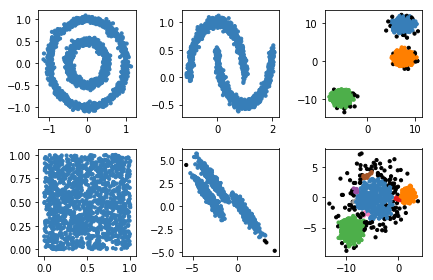

In [78]:
# DBSCAN 시각화

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred62) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

p1 = plt.subplot(2,3,1)
p1 = plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y_pred12])

p2 = plt.subplot(2,3,2)
p2 = plt.scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y_pred22])

p3 = plt.subplot(2,3,3)
p3 = plt.scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y_pred32])

p4 = plt.subplot(2,3,4)
p4 = plt.scatter(X4[:, 0], X4[:, 1], s=10, color=colors[y_pred42])

p5 = plt.subplot(2,3,5)
p5 = plt.scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y_pred52])

p6 = plt.subplot(2,3,6)
p6 = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y_pred62])

plt.tight_layout()
plt.show()

밀도기반인데 1,2,5번 데이터를 생각보다 못 분류함.  
EPS(점으로 부터 원 까지 반지름)를 낮춰주거나,  
min_samples 옵션을 올려서 더 높은 밀도를 사용해 보겠음. 

In [88]:
# eps 는 0.5에서 0.3으로 낮춤, samples는 5개에서 6개로 높임.
DB2 = DBSCAN(eps=0.3,min_samples=6)    
y_pred12 = DB2.fit_predict(X1)
y_pred22 = DB2.fit_predict(X2)
y_pred32 = DB2.fit_predict(X3)
y_pred42 = DB2.fit_predict(X4)
y_pred52 = DB2.fit_predict(X5)
y_pred62 = DB2.fit_predict(X6)

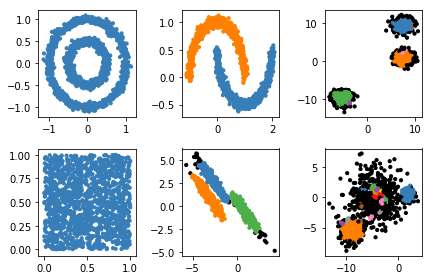

In [89]:
# DBSCAN 시각화

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred62) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

p1 = plt.subplot(2,3,1)
p1 = plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y_pred12])

p2 = plt.subplot(2,3,2)
p2 = plt.scatter(X2[:, 0], X2[:, 1], s=10, color=colors[y_pred22])

p3 = plt.subplot(2,3,3)
p3 = plt.scatter(X3[:, 0], X3[:, 1], s=10, color=colors[y_pred32])

p4 = plt.subplot(2,3,4)
p4 = plt.scatter(X4[:, 0], X4[:, 1], s=10, color=colors[y_pred42])

p5 = plt.subplot(2,3,5)
p5 = plt.scatter(X5[:, 0], X5[:, 1], s=10, color=colors[y_pred52])

p6 = plt.subplot(2,3,6)
p6 = plt.scatter(X6[:, 0], X6[:, 1], s=10, color=colors[y_pred62])

plt.tight_layout()
plt.show()

앞과 비교해보면 2번, 5번 데이터를 군집화하는데 성공함!  
특히 2번 데이터는 아주 군집화가 잘 되었음.  
그런데 2번 5번을 얻고 6번을 잃음  
  
밀도 기반이기 때문에 6번 데이터 중에 가운데 밀도가 낮은 부분은 군집화가 되지 않고  
노이즈로 없어지는 것 볼 수 있음
  
1번 데이터만 하이퍼파라미터를 다시 조정해서 그려보겠음

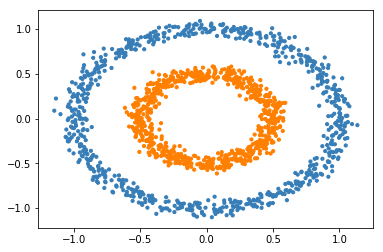

In [90]:
# 1번
DB3 = DBSCAN(eps=0.2,min_samples=6)  
y_pred122 = DB3.fit_predict(X1)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred122) + 1))))
# add black color for outliers (if any)
colors = np.append(colors, ["#000000"])

plt.scatter(X1[:, 0], X1[:, 1], s=10, color=colors[y_pred122])
plt.show()

군집 성공..!

### 3. 계층형 군집 모델
앞에 한 분리형 군집 모델과 다른 계층형 군집 모델을 적용해본다.  
Agglomerative Hierarchical Clustering
응집형 계층적 군집화 알고리즘

In [95]:
# scipy에 내장된 계층적 군집화 패키지 사용
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
"""
linkage(y, method='single', metric='euclidean'
        , optimal_ordering=False)
"""

In [126]:
# 6개의 데이터를 계층적 군집화 시킴
# 클러스터간의 거리측정 방식 5가지 중에 single 선택 

linked1 = linkage(X1,method = 'single')
labelList1 = range(1,len(X1)+1)

linked2 = linkage(X2,method = 'single')
labelList2 = range(1,len(X2)+1)

linked3 = linkage(X3,method = 'single')
labelList3 = range(1,len(X3)+1)

linked4 = linkage(X4,method = 'single')
labelList4 = range(1,len(X4)+1)

linked5 = linkage(X5,method = 'single')
labelList5 = range(1,len(X5)+1)

linked6 = linkage(X6,method = 'single')
labelList6 = range(1,len(X6)+1)


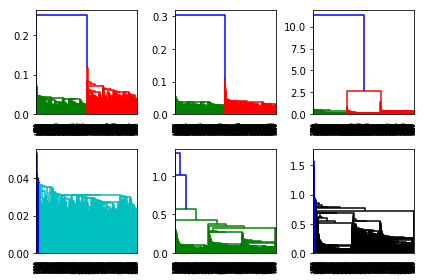

In [127]:
d1 = plt.subplot(2,3,1)
d1 = dendrogram(linked1,
            orientation='top',
            labels=labelList1,
            distance_sort='descending',
            show_leaf_counts=True)

d2 = plt.subplot(2,3,2)
d2 = dendrogram(linked2,
            orientation='top',
            labels=labelList2,
            distance_sort='descending',
            show_leaf_counts=True)

d3 = plt.subplot(2,3,3)
d3 = dendrogram(linked3,
            orientation='top',
            labels=labelList3,
            distance_sort='descending',
            show_leaf_counts=True)

d4 = plt.subplot(2,3,4)
d4 = dendrogram(linked4,
            orientation='top',
            labels=labelList4,
            distance_sort='descending',
            show_leaf_counts=True)

d5 = plt.subplot(2,3,5)
d5 = dendrogram(linked5,
            orientation='top',
            labels=labelList5,
            distance_sort='descending',
            show_leaf_counts=True)

d6 = plt.subplot(2,3,6)
d6 = dendrogram(linked6,
            orientation='top',
            labels=labelList6,
            distance_sort='descending',
            show_leaf_counts=True)


plt.tight_layout()
plt.show()

1500 by 1500 matrix이기 때문에 덴드로그램 그리기 개오래걸림.
ward's 방법 사용하는 것 한 가지만 더 해보겠음.

In [124]:
# 6개의 데이터를 계층적 군집화 시킴
# 클러스터간의 거리측정 방식 5가지 중에 single 선택 

linked1 = linkage(X1,method = 'ward')
labelList1 = range(1,len(X1)+1)

linked2 = linkage(X2,method = 'ward')
labelList2 = range(1,len(X2)+1)

linked3 = linkage(X3,method = 'ward')
labelList3 = range(1,len(X3)+1)

linked4 = linkage(X4,method = 'ward')
labelList4 = range(1,len(X4)+1)

linked5 = linkage(X5,method = 'ward')
labelList5 = range(1,len(X5)+1)

linked6 = linkage(X6,method = 'ward')
labelList6 = range(1,len(X6)+1)

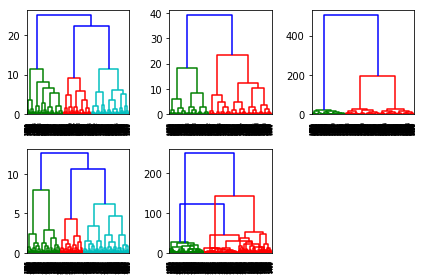

In [125]:
d1 = plt.subplot(2,3,1)
d1 = dendrogram(linked1,
            orientation='top',
            labels=labelList1,
            distance_sort='descending',
            show_leaf_counts=True)

d2 = plt.subplot(2,3,2)
d2 = dendrogram(linked2,
            orientation='top',
            labels=labelList2,
            distance_sort='descending',
            show_leaf_counts=True)

d3 = plt.subplot(2,3,3)
d3 = dendrogram(linked3,
            orientation='top',
            labels=labelList3,
            distance_sort='descending',
            show_leaf_counts=True)

d4 = plt.subplot(2,3,4)
d4 = dendrogram(linked4,
            orientation='top',
            labels=labelList4,
            distance_sort='descending',
            show_leaf_counts=True)

d5 = plt.subplot(2,3,5)
d5 = dendrogram(linked5,
            orientation='top',
            labels=labelList5,
            distance_sort='descending',
            show_leaf_counts=True)

d6 = plt.subplot(2,3,6)
d6 = dendrogram(linked6,
            orientation='top',
            labels=labelList6,
            distance_sort='descending',
            show_leaf_counts=True)


plt.tight_layout()
plt.show()

single 방법보다 ward가 훨씬 예쁜 계층적 군집화가 되었음.  
데이터를 하나의 군집으로 묶음으로써 생기는 정보의 손실을 측정해주기 때문.

***

## 아래의 탐구 과정은 코드를 통해 직접 확인하며 분석하면 Best! 

## 하지만 본인이 탐구하고 찾아본 내용에 대해 한글이나 Word로 정리해서(그렇다고 글만 있으면 X, 그림이나 예시에 대한 시각적인 자료 활용) 제출해도 OK~

### 조건
 - 복붙은 절대X
 - 본인이 이해한 내용을 바탕으로 설명할 것!
 - 아래는 탐구하는 방법에 대한 예시

# 2) Hierarchical Clustering
### 클러스터간의 거리 측정 방식에 따른 분석
 - Min(Single Link) , Max(Complete Link), Group Average, Centroid, Ward
 - 위의 방법에 따라 각각 어떤 특징이 있을까?     
 ex) https://www.stat.cmu.edu/~ryantibs/datamining/lectures/05-clus2.pdf     
 ex) 클러스터의 형태는 어떠한지? Single Link의 Chaining, Complete Link의 Crowding...    
 ex) 이상치가 어떤 영향을 미치는지?     
 ex) http://homes.di.unimi.it/valenti/SlideCorsi/MB0910/HierarchicalClustering.pdf

In [131]:
from IPython.display import Image

linkage() 함수가 클러스터 간의 거리 측정 방식 중에 강의 때 진행하지 않은 weighted 방법도 지원함,  
method 옵션을 지원함. 
linkage(y, method='single', metric='euclidean'
        , optimal_ordering=False)
        
1. single
2. complete
3. weighted
4. average
5. centroid 
6. ward
![toydata](toydata.png)

1. single  
코드는 1) 참고, 덴드로이드는 다음과 같음.
위의 toydata의 모양과 덴드로이드 방법을 비교해봤을 때  

생각보다 3,6번데이터와 같이 서로 다른 밀도를 가지지만 눈으로 구분할 수 있는 군집에 대해서 분류를 잘 못함.
5번 데이터에 대해서도 분류가 잘 안 됨을 볼 수 있음.  


![single](single.png)

2. complete 방법
덴드로이드를 찍어보면 잘된 듯 보이지만 4번데이터에 대해서도 여러가지로 군집화를 시킨 것을 보면 오버피팅 되었음을 알 수 있다.  
max proximity 방법인데 single은 언더피팅, max proximity는 오버피팅 되는 것 같다.

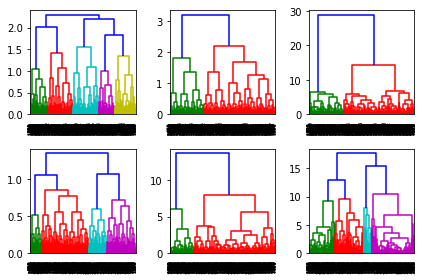

In [132]:
linked1 = linkage(X1,method = 'complete')
labelList1 = range(1,len(X1)+1)

linked2 = linkage(X2,method = 'complete')
labelList2 = range(1,len(X2)+1)

linked3 = linkage(X3,method = 'complete')
labelList3 = range(1,len(X3)+1)

linked4 = linkage(X4,method = 'complete')
labelList4 = range(1,len(X4)+1)

linked5 = linkage(X5,method = 'complete')
labelList5 = range(1,len(X5)+1)

linked6 = linkage(X6,method = 'complete')
labelList6 = range(1,len(X6)+1)

# 덴드로이드 시각화
d1 = plt.subplot(2,3,1)
d1 = dendrogram(linked1,
            orientation='top',
            labels=labelList1,
            distance_sort='descending',
            show_leaf_counts=True)

d2 = plt.subplot(2,3,2)
d2 = dendrogram(linked2,
            orientation='top',
            labels=labelList2,
            distance_sort='descending',
            show_leaf_counts=True)

d3 = plt.subplot(2,3,3)
d3 = dendrogram(linked3,
            orientation='top',
            labels=labelList3,
            distance_sort='descending',
            show_leaf_counts=True)

d4 = plt.subplot(2,3,4)
d4 = dendrogram(linked4,
            orientation='top',
            labels=labelList4,
            distance_sort='descending',
            show_leaf_counts=True)

d5 = plt.subplot(2,3,5)
d5 = dendrogram(linked5,
            orientation='top',
            labels=labelList5,
            distance_sort='descending',
            show_leaf_counts=True)

d6 = plt.subplot(2,3,6)
d6 = dendrogram(linked6,
            orientation='top',
            labels=labelList6,
            distance_sort='descending',
            show_leaf_counts=True)


plt.tight_layout()
plt.show()


3. weighted 방법  
강의안에서 배우지 않은 내용, 따로 검색을 통해 해당부분 설명을 추가 하겠음.  
덴드로그램 결과값은 지역적 패턴은 군집화를 잘 못하지만 상대적으로 3번 6번 데이터는 군집을 잘 했음을 알 수 있음.

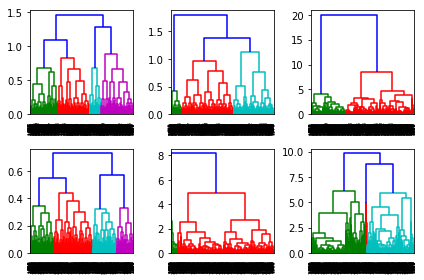

In [133]:
linked1 = linkage(X1,method = 'weighted')
labelList1 = range(1,len(X1)+1)

linked2 = linkage(X2,method = 'weighted')
labelList2 = range(1,len(X2)+1)

linked3 = linkage(X3,method = 'weighted')
labelList3 = range(1,len(X3)+1)

linked4 = linkage(X4,method = 'weighted')
labelList4 = range(1,len(X4)+1)

linked5 = linkage(X5,method = 'weighted')
labelList5 = range(1,len(X5)+1)

linked6 = linkage(X6,method = 'weighted')
labelList6 = range(1,len(X6)+1)

# 덴드로이드 시각화
d1 = plt.subplot(2,3,1)
d1 = dendrogram(linked1,
            orientation='top',
            labels=labelList1,
            distance_sort='descending',
            show_leaf_counts=True)

d2 = plt.subplot(2,3,2)
d2 = dendrogram(linked2,
            orientation='top',
            labels=labelList2,
            distance_sort='descending',
            show_leaf_counts=True)

d3 = plt.subplot(2,3,3)
d3 = dendrogram(linked3,
            orientation='top',
            labels=labelList3,
            distance_sort='descending',
            show_leaf_counts=True)

d4 = plt.subplot(2,3,4)
d4 = dendrogram(linked4,
            orientation='top',
            labels=labelList4,
            distance_sort='descending',
            show_leaf_counts=True)

d5 = plt.subplot(2,3,5)
d5 = dendrogram(linked5,
            orientation='top',
            labels=labelList5,
            distance_sort='descending',
            show_leaf_counts=True)

d6 = plt.subplot(2,3,6)
d6 = dendrogram(linked6,
            orientation='top',
            labels=labelList6,
            distance_sort='descending',
            show_leaf_counts=True)


plt.tight_layout()
plt.show()


4. average

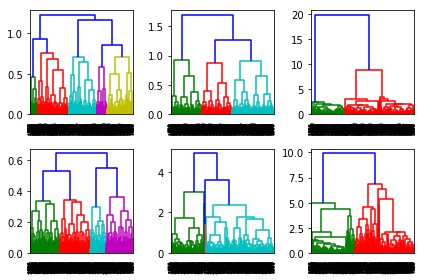

In [134]:
linked1 = linkage(X1,method = 'average')

linked2 = linkage(X2,method = 'average')
labelList2 = range(1,len(X2)+1)

linked3 = linkage(X3,method = 'average')
labelList3 = range(1,len(X3)+1)

linked4 = linkage(X4,method = 'average')
labelList4 = range(1,len(X4)+1)

linked5 = linkage(X5,method = 'average')
labelList5 = range(1,len(X5)+1)

linked6 = linkage(X6,method = 'average')
labelList6 = range(1,len(X6)+1)

# 덴드로이드 시각화
d1 = plt.subplot(2,3,1)
d1 = dendrogram(linked1,
            orientation='top',
            labels=labelList1,
            distance_sort='descending',
            show_leaf_counts=True)

d2 = plt.subplot(2,3,2)
d2 = dendrogram(linked2,
            orientation='top',
            labels=labelList2,
            distance_sort='descending',
            show_leaf_counts=True)

d3 = plt.subplot(2,3,3)
d3 = dendrogram(linked3,
            orientation='top',
            labels=labelList3,
            distance_sort='descending',
            show_leaf_counts=True)

d4 = plt.subplot(2,3,4)
d4 = dendrogram(linked4,
            orientation='top',
            labels=labelList4,
            distance_sort='descending',
            show_leaf_counts=True)

d5 = plt.subplot(2,3,5)
d5 = dendrogram(linked5,
            orientation='top',
            labels=labelList5,
            distance_sort='descending',
            show_leaf_counts=True)

d6 = plt.subplot(2,3,6)
d6 = dendrogram(linked6,
            orientation='top',
            labels=labelList6,
            distance_sort='descending',
            show_leaf_counts=True)


plt.tight_layout()
plt.show()


5. centroid

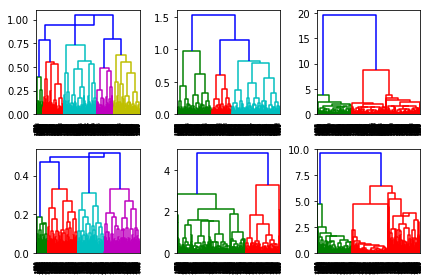

In [135]:
linked1 = linkage(X1,method = 'centroid')
labelList1 = range(1,len(X1)+1)

linked2 = linkage(X2,method = 'centroid')
labelList2 = range(1,len(X2)+1)

linked3 = linkage(X3,method = 'centroid')
labelList3 = range(1,len(X3)+1)

linked4 = linkage(X4,method = 'centroid')
labelList4 = range(1,len(X4)+1)

linked5 = linkage(X5,method = 'centroid')
labelList5 = range(1,len(X5)+1)

linked6 = linkage(X6,method = 'centroid')
labelList6 = range(1,len(X6)+1)

# 덴드로이드 시각화
d1 = plt.subplot(2,3,1)
d1 = dendrogram(linked1,
            orientation='top',
            labels=labelList1,
            distance_sort='descending',
            show_leaf_counts=True)

d2 = plt.subplot(2,3,2)
d2 = dendrogram(linked2,
            orientation='top',
            labels=labelList2,
            distance_sort='descending',
            show_leaf_counts=True)

d3 = plt.subplot(2,3,3)
d3 = dendrogram(linked3,
            orientation='top',
            labels=labelList3,
            distance_sort='descending',
            show_leaf_counts=True)

d4 = plt.subplot(2,3,4)
d4 = dendrogram(linked4,
            orientation='top',
            labels=labelList4,
            distance_sort='descending',
            show_leaf_counts=True)

d5 = plt.subplot(2,3,5)
d5 = dendrogram(linked5,
            orientation='top',
            labels=labelList5,
            distance_sort='descending',
            show_leaf_counts=True)

d6 = plt.subplot(2,3,6)
d6 = dendrogram(linked6,
            orientation='top',
            labels=labelList6,
            distance_sort='descending',
            show_leaf_counts=True)


plt.tight_layout()
plt.show()


6. ward
위의 1)에서 했기 때문에 코드는 위를 참고
![ward](ward.png)

계층적 군집화에서 6가지 군집구성법을 비교해 봤을 때를 정리 해보면,  
다음과 같이 데이터의 모습에 따라 분류가 잘되는 방법을 분류 해 봤다.  

육안으로 봐도 분리가 잘되는 경우 ex) 3번 6번 데이터 : weighted
밀도가 다른 6번 데이터도 미세하지만 3가지 부분으로 나눠서 군집했다.  

지역적 패턴을 가진 경우 ex) 1번,2번,5번 : 뭘 해도 잘 분류가 안되지만 single방법은 피해야한다. 모두 한가지의 군집으로 분류하는 등 매우 잘 안된다.  

눈으로 봐도 딱히 군집을 잘 찾을 수 없는 산발적인 경우
ex) 4번 데이터 : 의외로 single 방법만 이를 통채로 하나의 군집으로 분류했고 나머지는 억지로라도 군집을 구성하느라 잘 안된 듯 하다.  

데이터로 얻은 덴드로그램으로 각 데이터에 따른 방법 사용에 대해서 생각 해 보았는데 정답일지는 모르겠다.

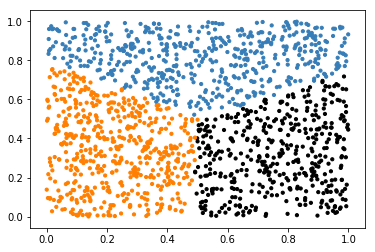

In [136]:
# 참고, 4번 데이터
p4 = plt.scatter(X4[:, 0], X4[:, 1], s=10, color=colors[y_pred4])
plt.show()

# 3) K-Means Clustering
### 초기값/update Centroid
 - 랜덤 초기화, Forgy 알고리즘, MacQueen 알고리즘 등
 - K-Means++?
 
### K를 위한 Elbow Point

In [ ]:
"""
KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, 
tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, 
copy_x=True, n_jobs=None, algorithm='auto')
"""

n_clusters : int, default=8
    군집 갯수 K개 선택, 8개의 초기 중심점을 선택한다.

init : {'k-means++', 'random'} 
    초기 중심점 방법에는 크게 'k-means++'와 'random'옵션이 있는데 디폴트는 k-means++이다.

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': k개의 초기점을 random으로 선택한다.
    
    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

n_init : int, default=10
    다른 중심점들에서 k-means 알고리즘을 실행하는 횟수, 
    최종 결과가 n_init 번 연속적인 실행을 했을 때 얻어지는 최선의 결과
    
    Number of time the k-means algorithm will be run with different
    centroid seeds. The final results will be the best output of
    n_init consecutive runs in terms of inertia.
    
    k- 평균 알고리즘이 다른 중심 시드로 실행될 시간입니다. 
    최종 결과는 관성 측면에서 n_init 연속 실행의 최상의 결과입니다
    
    n_init가 잘 이해안감.

max_iter : int, default=300
    Maximum number of iterations of the k-means algorithm for a
    single run.
    k-means 알고리즘 한 번 실행에 반복되는 최대 숫자
    즉 알고리즘을 돌릴 때 centroid를 최대 300번 까지 업데이트 하도록 한다.

http://hellohyun.blogspot.com/2016/12/k-means-algorithm-clustering.html

초기화 기법 >>
 - 무작위 분할 (Random Partition)
가장 많이 쓰이는 초기화 기법으로, 각 데이터들을 임의의 클러스터에 배당하고 각 클러스터에 배당된 점들의 평균값을 초기값으로 설정한다. 다른 기법들과 달리 데이터 순서에 대해 독립적이다. 초기 클러스터가 각 데이터에 대해 고르게 분포되기 때문에 각 초기 클러스터의 무게중심들이 데이터 집합 중심에 가깝게 위치하는 경향을 띈다. (초기 클러스터를 만들고 초기점 설정하는 방법을 생각하면 당연함.) 이러한 특성 때문에 K-조화 평균이나 K-평군에서는 무작위 분할이 선호된다.

 - Forgy
데이터 집합으로 부터 임의의 k개의 데이터를 선택하여 각 클러스터의 초기점으로 설정한다. 데이터 순서에 대해 독립적이고 초기 클러스터가 임의의 k개의 점들에 의해 설정되기 때문에 클러스터의 무게중심은 중심으로 부터 퍼져있는 경향을 띈다. 이러한 특성 때문에 EM 알고리즘이나 표준 k-평균 알고리즘에서 선호된다.

 - MacQueen
Forgy알고리즘과 마찬가지로 데이터 집합으로부터 임의의 k개의 데이터를 선택하여 각 클러스터의 초기값으로 설정한다. 이 후 선택되지 않은 데이터들을 해당 점으로 부터 가까운 클러스터를 찾아 배당한다. 모든 데이터들이 배당된 후 각 클러스터의 무게중심을 다시 계산하여 초기값으로 설정한다. 최종 수렴에 가까운 클러스터를 찾는 것은 비교적 빠르나, 최종 수렴에 해당하는 클러스터를 찾는 것은 매우 느리다. -> 최종수렴과 비슷한 클러스터가 비슷비슷하게 가까운 것이 여러개인 것 같다.

 - Kaufman
전체 데이터 집합 중 가장 중심에 위치한 데이터를 첫번째 초기값으로 설정한다. 이후 선택되지 않은 각 데이터들에 의해, 가장 가까운 무게중심 보다 선택되지 않은 데이터 집합에 더 근접하게 위치한 데이터를 초기값으로 설정한다. 이를 총 k개의 초기값이 설정될 때 까지 반복한다. 무작위 분할과 마찬가지로 초기 클러스터링과 데이터 순서에 대해 비교적 독립적이기 때문에 해당 요소들에 의존적인 다른 알고리즘들 보다 월등한 성능을 보인다.


<K-means 알고리즘 한계점>

클러스터 개수 K값을 파라미터로 지정해주어야 한다. 이 알고리즘은 k값에 따라 결과값이 완전히 달라진다.
알고리즘의 에러 수렴이 전역 최솟값이 아닌 지역 최솟값으로 수렴할 가능성이 있다.(global min 값을 찾지 못할 가능성 ㅇ) (그래서 초기값을 주는 방법이 중요)

이상값에 민감하다. 큰 에러 수치에 의하여 클러스터 내의 전체 평균값이 크게 왜곡될 수 있다. 
(많이 몰려 있는 곳의 중심이 클러스터의 중심이어야 가장 좋은데 큰 에러 값이 그것을 중심을 크게 변화 시킨다)

구형으로 분포하는 형상이 아닌 클러스터를 찾는데는 적절하지 않다. (많이 몰려 있는것을 중심으로 구분을 하는것이 알고리즘의 목적이므로..)


### KMeans의 Elbow 기법
k-means 클러스터링은 클러스터내 오차제곱합 SSE 값이 최소가 되도록 클러스터의 중심을 결정해나가는 방법이기 때문에 클러스터의 개수를 늘려가면서 계산한 SSE를 그래프로 그려본다.

https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=221017639342&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [44]:
# KMeans를 위한 elbow point찾기 -> 위의 Toy데이터 중에 3번 이용.

def elbow(X):
    sse = []
    
    for i in range(1,11):
        km = KMeans(n_clusters=i, algorithm='auto', init = 'k-means++', random_state =0)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11),sse,marker='o')
    plt.xlabel('클러스터 갯수')
    plt.ylabel('SSE')
    plt.show()  

plt.rc('font', family='Malgun Gothic')

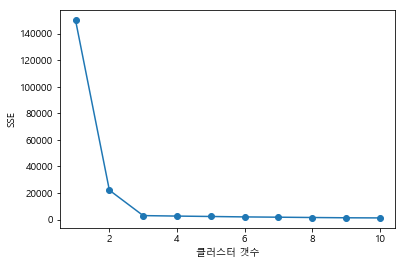

In [49]:
elbow(X3)

# toy data의 3번째 데이터의 Kmeans clustering의 elbow point가 3임을 알 수 있다.

## <추가로 KMeans Clustering을 직접 구현시 참고해볼만한 사이트>

https://brunch.co.kr/@rlawlgy43/32

# 4) DBSCAN
### Eps, min_samples(minPts)의 변화에 따른 분석
 - 파라머_Clustering.ipynb의 DBSCAN 부분
 - min_samples가 커지면?
 - eps가 커지면?

개념적으로 MinPts (min_samples)는 원안에 속하는 샘플의 갯수, eps는 원의 반지름 길이임을 참고하면
MinPts는 클 수록, eps는 작을 수록 더 모여있는(분산이 작은) 클러스터링에 적합함을 알 수 있다.  
다음은 mglearn에 내장된 dbscan()으로 각 샘플갯수와 반지름에 따른 그래프를 그린 결과이다.

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


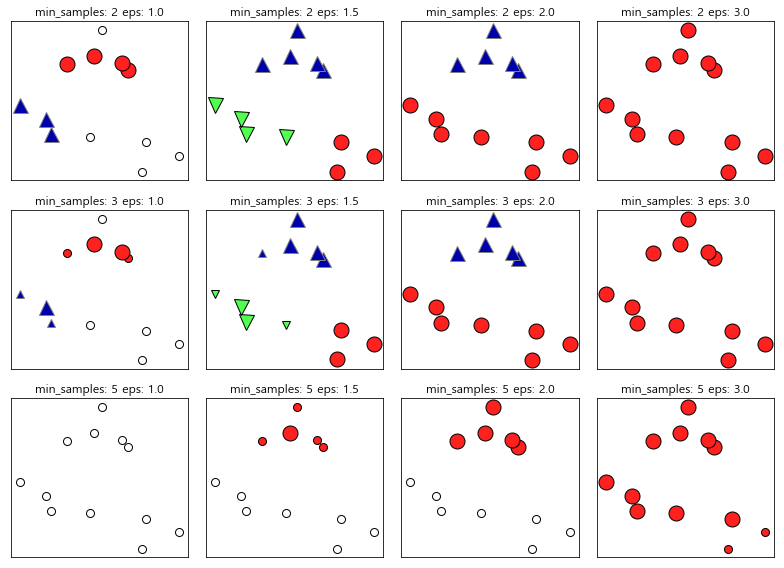

In [52]:
# https://github.com/amueller/mglearn/blob/master/mglearn/plot_dbscan.py
import mglearn
mglearn.plots.plot_dbscan() 
# min_samples와 eps 변화에 따라 클러스터 모양의 변화 -> 과제 #2에 참고
# 클러스터에 속한 포인트는 색을 칠하고 Noise Ponts는 하얀색
# Core Points는 크게, Border Points는 작게

극단적으로 min_samples가 5, eps 가 3.0일 때는 반지름의 크기가 3으로 너무 크기 때문에 분류를 잘 하지 못하고 모두 한개의 클러스터로 분류한다.  
  
해당 데이터에서는 min_samples가 2나 3일 때 eps1.5 가 가장 분류가 잘 됨을 볼 수 있다.



### 하이퍼파라미터을 조정해서 DBSCAN결과를 조정해본 값은 위의 1번 toy data적용 참고!

### 이외에도 클러스터링에 대한 궁금증을 다양하게 깊게 파보는 과정이라면 다 좋아요!